In [4]:
import mysql.connector as connector

conn = connector.connect(user='root', password='123456', host='localhost', port='3306', database='my_db')

my_cursor = conn.cursor()

In [5]:
my_cursor.execute('Select * from price_sentiment')

results = my_cursor.fetchall()

In [6]:
import pandas as pd

df = pd.DataFrame(results, columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock_Splits', 'Score', 'Positive', 'Negative', 'Neutral',	'Total_Sentiment'])



In [7]:
df.set_index('Date', drop=True, inplace=True)

In [8]:
df

,Open,High,Low,Close,Volume,Dividends,Stock_Splits,Score,Positive,Negative,Neutral,Total_Sentiment
Date,,,,,,,,,,,,
2014-01-06,0.373259,0.377267,0.369722,0.374438,409492000.0,0.0,0.0,0.891770,0,0,1,0.00000
2014-04-23,0.447659,0.453344,0.446949,0.452159,261580000.0,0.0,0.0,0.523616,0,1,0,-1.00000
2015-06-01,0.539048,0.547035,0.535659,0.541710,372660000.0,0.0,0.0,0.661305,0,0,1,0.00000
2016-01-05,0.804687,0.815911,0.792976,0.802491,490272000.0,0.0,0.0,0.580586,1,0,0,1.00000
2016-09-28,1.639140,1.643820,1.621680,1.642590,319788000.0,0.0,0.0,0.868531,0,0,1,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10,130.090000,135.000000,129.960000,133.570000,216989000.0,0.0,0.0,0.793545,6,4,15,5.84000
2025-02-11,132.580000,134.480000,131.020000,132.800000,178902000.0,0.0,0.0,0.840833,4,2,16,3.90909
2025-02-12,130.020000,132.240000,129.080000,131.140000,160279000.0,0.0,0.0,0.788741,5,4,8,4.76471


In [9]:
df = df.sort_index()

In [14]:
from sklearn.preprocessing import MinMaxScaler

df_columns = df.columns
scaler = MinMaxScaler()

df_transformed = scaler.fit_transform(df)

df_transformed = pd.DataFrame(df_transformed)

df_transformed.columns = df_columns

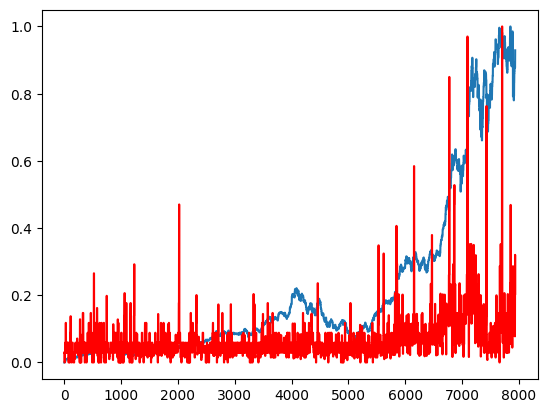

In [15]:
import matplotlib.pyplot as plt

plt.plot(df_transformed.index, df_transformed['Close'])
plt.plot(df_transformed.index, df_transformed['Total_Sentiment'],color ='red')
plt.show()

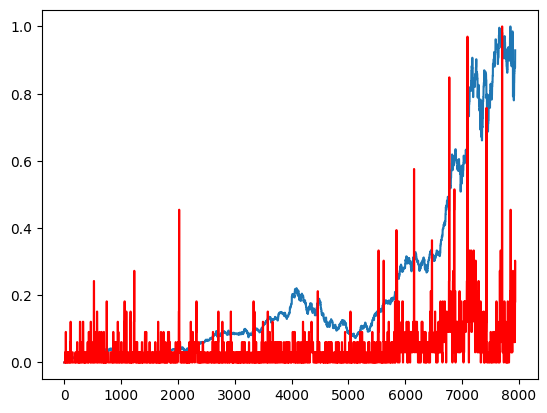

In [16]:
plt.plot(df_transformed.index, df_transformed['Close'])
plt.plot(df_transformed.index, df_transformed['Positive'],color ='red')
plt.show()